# HW 6: Neural Network

In this guided tutorial, we will start with neural network. We will learn how to build and a train a neural network using Python library Keras.

If you need an introduction to CNNs, you can read this: https://towardsdatascience.com/simple-introduction-to-convolutional-neural-networks-cdf8d3077bac

## Part 0: Classify hand-written digits

We will take a look at a first concrete example of a neural network using Keras library: https://keras.io/. First, you have to install Keras library. Here is the instructions: https://keras.io/about. As you saw in documentation you have first to install TensorFlow, Theano, or CNTK and then Keras library. We recommend the TensorFlow backend. (For most of you: just use commands 'pip install tensorflow' followed by 'pip install keras') <br>
We will learn how to classify hand-written digits. Unless you already have experience with Keras or similar libraries, you will not understand everything about this first example right away. Don't worry if some steps seem arbitrary or look like magic to you! We've got to start somewhere.

The problem we are trying to solve here is to classify grayscale images of handwritten digits (28 pixels by 28 pixels), into their 10 categories (0 to 9). The dataset we will use is the MNIST dataset, a classic dataset in the machine learning community, which has been around for almost as long as the field itself and has been very intensively studied. It's a set of 60,000 training images, plus 10,000 test images, assembled by the National Institute of Standards and Technology (the NIST in MNIST) in the 1980s. You can think of "solving" MNIST as the "Hello World" of deep learning -- it's what you do to verify that your algorithms are working as expected. As you get deep in machine learning field, you will see MNIST come up over and over again, in scientific papers, blog posts, and so on.

Let us first import keras:

In [1]:
import keras
keras.__version__

'2.4.3'

The MNIST dataset comes pre-loaded in Keras, in the form of a set of four Numpy arrays:

In [2]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Our images are encoded as Numpy arrays, and the labels are simply an array of digits, ranging from 0 to 9. There is a one-to-one correspondence between the images and the labels.<br>
Let's have a look at the training data:

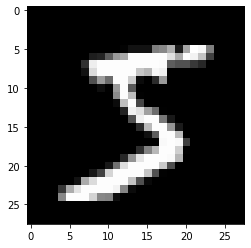

This is a handwritten number  5
Shape of input matrix:  (60000, 28, 28)


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

image_nr = 0
plt.imshow(train_images[image_nr], cmap='gray', vmin=0, vmax=255)
plt.show()
print('This is a handwritten number ', train_labels[image_nr])

print('Shape of input matrix: ', train_images.shape)

#### Question 1.1 (5 points): The 'shape' of the matrix is (60000, 28, 28). What do each of these numbers mean?

60000 represents the number of images in the train dataset and (28, 28) represents the size of image: 28x28 pixel.

Our workflow will be as follows: first we will present our neural network with the training data, train_images, and train_labels. The network will then learn to associate images and labels. Finally, we will ask the network to produce predictions for test_images, and we will verify if these predictions match the labels from test_labels. Let's build our network:

In [4]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

The core building block of neural networks is the "layer", a data-processing module which you can conceive as "transforming" your data. Some  data comes in, and comes out in a more useful form. Precisely, layers extract _representations_ out of the data fed into them -- hopefully  representations that are more meaningful for the problem at hand. Most of deep learning really consists of chaining together simple (or sometimes more complex) layers which will implement a form of progressive "data distillation". A deep learning model is like a sieve for data processing, made of a  succession of increasingly refined data filters -- the "layers".

Here our network consists of a sequence of two `Dense` layers, which are densely-connected (also called "fully-connected") neural layers. 
The second (and last) layer is a 10-way "softmax" layer, which means it will return an array of 10 probability scores (summing to 1). Each score will be the probability that the current digit image belongs to one of our 10 digit classes.

#### Question 1.2 (5 points): Search internet and keras help to understand what "softmax" is doing. Can you explain why it is a popular choice for mutlti-class classification problems?
Softmax is often used as the activation for the last layer of a classification network because the result could be interpreted as a probability distribution.
For multi-class classificatin problems the popular choice is *softmax*, because instead of selecting only one maximum value, it assigns the maximal element largest portion of the distribution, and another smaller elemtns getting some part of the distribution.

#### Question 1.3 (5 points): Could you explain why we use 'relu' in first layer and 'softmax' in the second layer? A friend tells you that 'tanh' can be a good activation function. To try it out, would you replace 'relu', 'softmax' or both? Justify your answer.

ReLUs have a remarkable tendency to be better for neural networks that have a degree of dichotomy. Softmax is great for our inferential ability. It is normally used in the last layer of neural network to calculate the probabilites distribution of the event over n differents events. The main advantage of the function is able to handle multiple classes.

Tanh, is a logistic function that maps the outputs to the range of (-1,1). Tanh can be used in binary classification, that is why i would replace it for softmax.



To make our network ready for training, we need to pick three more things, as part of "compilation" step:

* A loss function: this is how the network will be able to measure how good a job it is doing on its training data, and thus how it will be 
able to steer itself in the right direction.
* An optimizer: this is the mechanism through which the network will update itself based on the data it sees and its loss function. 'rmsprop' is specific type of the gradient descent algorithm. Keras offers a few versions of the optimizer.
* Metrics to monitor during training and testing. Here we will only care about accuracy (the fraction of the images that were correctly 
classified).

In [5]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

#### Question 1.4 (5 points): Search internet and keras documentation to understand 'categorical_crossentropy'. Could you explain why we use 'categorical_crossentropy' for loss function in this application?

Crossentropy loss function is used when there are two or more label classes, like in this case. We expect labels to be provided in a one_hot representation. Is a probabilistic loss.

Before training, we will preprocess our data by reshaping it into the shape that the network expects, and scaling it so that all values are in 
the `[0, 1]` interval. Previously, our training images for instance were stored in an array of shape `(60000, 28, 28)` of type `uint8` with 
values in the `[0, 255]` interval. We transform it into a `float32` array of shape `(60000, 28 * 28)` with values between 0 and 1.

In [6]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [7]:
import numpy as np
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

As you could see from the result above that labels are digits, ranging from 0 to 9. We will turn each digit into a one-hot vector of length 10.

In [8]:
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

We are now ready to train our network, which in Keras is done via a call to the `fit` method of the network: 
we "fit" the model to its training data. We can specify how many epoch of gradient descent are we using (how many passes through the whole data set) and what is the size of mini-batch for a single weigth update.

In [21]:
network.fit(train_images, train_labels, epochs=5, batch_size=256)

Epoch 1/5
235/235 [==============================] - 1s 6ms/step - loss: 7.4161e-04 - accuracy: 0.9998
Epoch 2/5
235/235 [==============================] - 1s 6ms/step - loss: 5.8163e-04 - accuracy: 0.9999
Epoch 3/5
235/235 [==============================] - 1s 6ms/step - loss: 3.6088e-04 - accuracy: 0.9999
Epoch 4/5
235/235 [==============================] - 1s 6ms/step - loss: 3.4239e-04 - accuracy: 0.9999
Epoch 5/5
235/235 [==============================] - 1s 6ms/step - loss: 2.9824e-04 - accuracy: 0.9999


Two quantities are being displayed during training: the "loss" of the network over the training data, and the accuracy of the network over 
the training data.

We quickly reach an high accuracy (around 98%) on the training data. Now let's check that our model performs well on the test set too:

In [22]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.0988 - accuracy: 0.9827


In [23]:
print('test_acc:', test_acc)

test_acc: 0.982699990272522


Our test set accuracy will be a bit lower than the training set accuracy. 

#### Question 1.5: What will be an example of overfiting here?

An example of overfitting would be that our accuracy on the training data is almost 99%, while on the test data it is 97%, which means that the model is not fully generalizing and is memorizing the training data.

#### Question 1.6 (5 points): Try to play with numbers of epochs and batch_size. What is your result compared to what we got?

With 3 epochs and 64 of batch_size we have an accuracy in training dataset of 98% and in the test dataset 97.63%, so we can conclude that the model is generalizing.

With epoch 5 and batch size 64, we receive an accuracy of 0.9788

With epoch 3 and batch size 128, we receive an accuracy of 0.9808

With epoch 5 and batch size 128, we receive an accuracy of 0.9811

With epoch 3 and batch size 256, we receive an accuracy of 0.9821

With epoch 5 and batch size 256, we receive an an accuracy of 0.9827

This concludes our very first example of neural network. We learn how we could build and a train a neural network to classify handwritten digits.

## Part 1:   Convolutional Neural Network (CNN) 

In this Part, we will learn how to train CNNs. CNNs are a very popular type of a neural network, particularly for data that come in a vector, matrix, or tensor (3 or higher dimensional array) form, such as sequences, images, and videos. The main innovation compared to the feedforward neural network, which relies on dense layers is a new type of a layer, called the convolutional layer. A neuron (called the filter) in CNN is a small vector, matrix (e.g., size 3x3 or 5x5) or a tensor that scans the input vector, matrix, or a tensor and produces a new vector, matrix, or a tensor. You can decide to use many such neurons in each convolutional layer.

In additon to the convolutional layer, CNNs also inroduce 'MaxPooling' layer which scans a block of an input matrix and finds the maximum value within each block. An outcome of this operation is reduction of the matrix size. Finally, CNNs also use the 'Flatten' operation which vectorizes the input matrix (e.g., converts a 10x10 input matrix into a vector of size 100). After the 'Flatten" operation CNNs typically add one or more dense layers.

For more details about CNN, please consult this blog: 
 https://towardsdatascience.com/simple-introduction-to-convolutional-neural-networks-cdf8d3077bac

All the code is provided. The code is allowing you to prepare the data and train a CNN that classifies which digit is written in an image provided at its input. We will show how you can train 4 different CNN, ranging from simple to more complex, and let you observe how it impacts classification accuracy. 

CNN training can take quite a bit of time (particularly if GPU isn't used), so we will create a training data set that uses a subset of available data. In particular, we will define the classification problem as recognizing whether a digit in an image is 7 or not. The following piece of code shows the data preparation steps.

In [29]:
#Import the required libraries
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.utils import np_utils
from tensorflow.keras.optimizers import Adam

The following block selects a subset of images from the MNIST data.

In [13]:
#Load the training and testing data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_test_orig = X_test

# Select the subset from the train data for the sake of time.
np.random.seed(1)  # for reproducibilty!!
# The subset is composed of all the examples where the digit is 7, and 20,000 examples are not 7.
sevens = np.where(y_train == 7)[0].tolist()
not_sevens = np.where(y_train != 7)[0].tolist()
num_keepers = 10000
not_sevens = np.random.choice(not_sevens, num_keepers, replace=False).tolist()

subset = sevens + not_sevens
np.random.shuffle(subset) # shuffle the input

X_train = X_train[subset, :, :]
y_train = y_train[subset]

#### Question 2.1 (5 points): Write code to check how many 'sevens' and how many 'not_sevens' there are in our training data? What is the accuracy of a classifier that always predicts that the input is not a seven?

In [14]:
print("We have", len(y_train[y_train==7]), "7s in our dataset")
print("We have", len(y_train[y_train!=7]), "numbers that are not 7s in our dataset")
print("The maximum accuracy of a model that always predicts that the input is not seven, is:", len(y_train[y_train!=7])/len(y_train)*100, "%")

We have 6265 7s in our dataset
We have 10000 numbers that are not 7s in our dataset
The maximum accuracy of a model that always predicts that the input is not seven, is: 61.48170919151552 %


The following code creates training and test data. It would be great if you can spend a few minutes trying to understand what is going on.

In [15]:
from keras import backend as K

img_rows, img_cols = 28, 28

if K.image_data_format() == 'channels_first':
    shape_ord = (1, img_rows, img_cols)
else:  # channel_last
    shape_ord = (img_rows, img_cols, 1)

# Normalize the images:

X_train = X_train.reshape((X_train.shape[0],) + shape_ord)
X_test = X_test.reshape((X_test.shape[0],) + shape_ord)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255


# Converting the labels to binary classification(Seven =1,Not Seven=0)
Y_train = (y_train == 7).astype(int)
Y_test = (y_test == 7).astype(int)

# Converting the classes to its binary categorical form
nb_classes = 2
Y_train = np_utils.to_categorical(Y_train, nb_classes)
Y_test = np_utils.to_categorical(Y_test, nb_classes)

In [16]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(16265, 28, 28, 1) (16265, 2) (10000, 28, 28, 1) (10000, 2)


### Train a simple CNN (CNN, model 1)

The following code will show how you can define CNN, train it, and test its accuracy. 

**Step 0.** The following is a preparation step, specifying the hyperparameters.

In [17]:
# -- Initializing the values for the convolution neural network

nb_epoch = 10  # kept very low! Please increase if you have GPU

batch_size = 64
# number of convolutional filters to use
nb_filters = 32
# size of pooling area for max pooling
nb_pool = 2
# convolution kernel size
nb_conv = 3

# SGD
optimizer = Adam(learning_rate=0.0002, amsgrad=True)

**Step 1.** In this step we define architecture of the CNN

Each line "model.add()" adds another layer to the neural network. The type of layer must be specified. 

In [18]:
model = Sequential()

model.add(Conv2D(nb_filters, (nb_conv, nb_conv), padding='valid', 
                 input_shape=shape_ord))  # note: the very first layer **must** always specify the input_shape
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(26, 26)))
model.add(Flatten())
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

We can check the configuration of the above model by call model.summary()

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
activation (Activation)      (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 1, 1, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
_________________________________________________________________
activation_1 (Activation)    (None, 2)                 0         
Total params: 386
Trainable params: 386
Non-trainable params: 0
________________________________________________________

#### Question 2.2 (5 points): From the above summary, can you explain the architecture of this CNN?

This CNN a convolutional layer that has 320 parameters followed by an activation function (relu), then we have a max_pooling to create dowsampled feature map, then we have a flatten layer to converts all the resultant 2-Dimensional arrays from pooled feature maps into a single long continous linear vector, then we have a dense layer is a layer that deeply connected with its preceding layer which means the neurons of the layer are connected to every neuron of its preceding layer, it has 66 parameters, and finally we have another activation layer, softmax in this case. In total this CNN has 386 parameters

**Step 2.** Here, we define the loss function. You will see that the loss function is not Mean Square Error, but Cross Entropy. Cross Entropy is a very popular choice when training neural networks for classification problems.

In [20]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

**Step 3.** This line of code trains CNN. This is going to take about a minute. Observe that we will only have 2 epochs of training, for the sake of time. You will see how the accuracy on training and valiadion data evolves during training.

In [21]:
hist = model.fit(X_train, Y_train, batch_size=batch_size, 
                 epochs=nb_epoch, verbose=1, 
                 validation_data=(X_test, Y_test))

Epoch 1/10
255/255 [==============================] - 3s 10ms/step - loss: 0.6642 - accuracy: 0.6148 - val_loss: 0.5125 - val_accuracy: 0.8972
Epoch 2/10
255/255 [==============================] - 3s 10ms/step - loss: 0.6509 - accuracy: 0.6148 - val_loss: 0.5214 - val_accuracy: 0.8972
Epoch 3/10
255/255 [==============================] - 3s 10ms/step - loss: 0.6381 - accuracy: 0.6148 - val_loss: 0.4940 - val_accuracy: 0.8972
Epoch 4/10
255/255 [==============================] - 2s 10ms/step - loss: 0.6240 - accuracy: 0.6148 - val_loss: 0.4983 - val_accuracy: 0.8972
Epoch 5/10
255/255 [==============================] - 3s 10ms/step - loss: 0.6056 - accuracy: 0.6172 - val_loss: 0.4922 - val_accuracy: 0.9024
Epoch 6/10
255/255 [==============================] - 2s 10ms/step - loss: 0.5843 - accuracy: 0.6456 - val_loss: 0.4546 - val_accuracy: 0.9079
Epoch 7/10
255/255 [==============================] - 2s 10ms/step - loss: 0.5621 - accuracy: 0.7101 - val_loss: 0.4523 - val_accuracy: 0.9339

Let us plot the accuracy. 

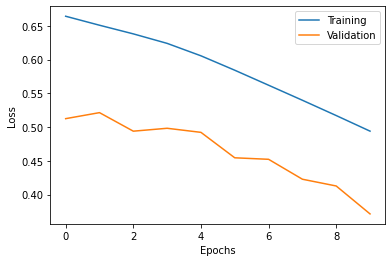

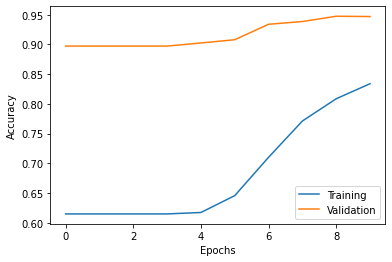

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['Training', 'Validation'])

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['Training', 'Validation'], loc='lower right')

**Step 4.** Evaluate the accuracy on test data.

In [23]:
# Evaluating the model on the test data    
loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

Test Loss: 0.3714348375797272
Test Accuracy: 0.9469000101089478


Let us visualize our model Predictions!

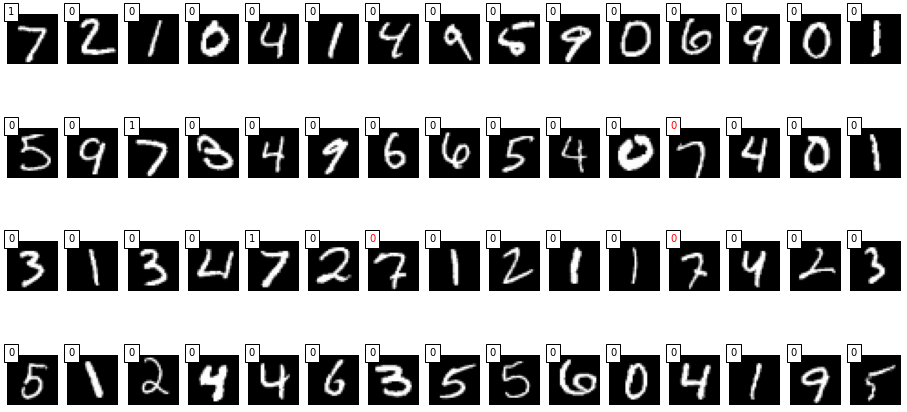

In [24]:
def show_results(model):
    rows = 4
    columns = 15
    sliced = rows*columns
    predicted = model.predict(X_test[:sliced]).argmax(-1)

    plt.figure(figsize=(16,8))
    for i in range(sliced):
        plt.subplot(rows, columns, i+1)
        plt.imshow(X_test_orig[i], cmap='gray', vmin=0, vmax=255)
        color = 'black' if Y_test[i, 1] == predicted[i] else 'red'
        plt.text(0, 0, predicted[i], color=color, 
                 bbox=dict(facecolor='white', alpha=1))
        plt.axis('off')

show_results(model)

#### Question 2.3 (5 points): Can you discuss the performance of the CNN model? What kind of errors is it making?

CNN performance is 89% accurate, but it always says the input is not 7, and it always mispredicts when the input is 7.

#### Question 2.4 (5 points): Go back to step 0, change number of epochs to 10 and run it again. How did it impact the accuracy?

When the epochs are 10 the accuracy increases to 93% and we can see that there are some entries are 7s and the model predicts it as 7, so we know that the model is generalizing a bit.

### Train a more complicated CNN (CNN, model 2)

Now, we will define a more complicated CNN architecture. We will train it for only 5 epochs to save time.

In [25]:
model = Sequential()
model.add(Conv2D(nb_filters, (nb_conv, nb_conv),
                 padding='valid', input_shape=shape_ord))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
model.add(Flatten())
model.add(Dense(16))
model.add(Activation('relu'))

model.add(Dense(nb_classes))
model.add(Activation('softmax'))

In [26]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_2 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 16)                86544     
_________________________________________________________________
activation_3 (Activation)    (None, 16)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 2)                

In [27]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

nb_epoch = 5
model.fit(X_train, Y_train, batch_size=batch_size, 
          epochs=nb_epoch,verbose=1,
          validation_data=(X_test, Y_test))

Epoch 1/5
255/255 [==============================] - 3s 12ms/step - loss: 0.1088 - accuracy: 0.9610 - val_loss: 0.1034 - val_accuracy: 0.9604
Epoch 2/5
255/255 [==============================] - 3s 12ms/step - loss: 0.0698 - accuracy: 0.9768 - val_loss: 0.0483 - val_accuracy: 0.9850
Epoch 3/5
255/255 [==============================] - 3s 12ms/step - loss: 0.0557 - accuracy: 0.9819 - val_loss: 0.0403 - val_accuracy: 0.9877
Epoch 4/5
255/255 [==============================] - 3s 13ms/step - loss: 0.0476 - accuracy: 0.9855 - val_loss: 0.0486 - val_accuracy: 0.9838
Epoch 5/5
255/255 [==============================] - 3s 12ms/step - loss: 0.0428 - accuracy: 0.9872 - val_loss: 0.0314 - val_accuracy: 0.9893


In [28]:
#Evaluating the model on the test data    
score, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score)
print('Test accuracy:', accuracy)

Test score: 0.03136247396469116
Test accuracy: 0.989300012588501


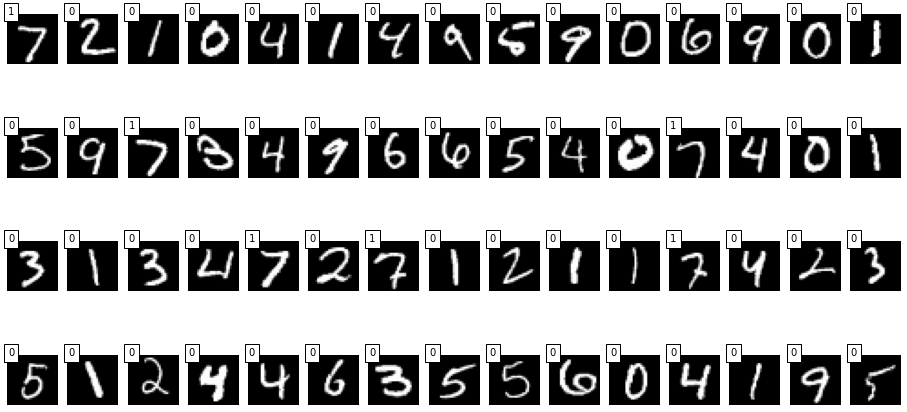

In [29]:
show_results(model)

#### Question 2.5 (5 points): Can you explain the architecture of this CNN (model 2) and how is it different from the first CNN you trained (model 1)? Compare their performance by looking at the visualizstions.

This CNN has a Conv2D layer, two dense layers, two relu activation functions, a softmax activation function, a Flatten layer and a Maxpooling layer. In total we have 86,898 parameters, while the first CNN had only 386 parameters, because it had fewer hidden layers.

As you can see in the image above our model now predicts much better than the previous CNN, it now ranks 1 when it thinks it is a 7 and 0 everything else.

### Adding more convolutional layers and MaxPooling layers (CNN, model 3)

Now, we will define an even more complicated CNN architecture.

In [30]:
model = Sequential()
model.add(Conv2D(nb_filters, (nb_conv, nb_conv),
                 padding='valid', input_shape=shape_ord))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
model.add(Conv2D(nb_filters, (nb_conv, nb_conv), 
                 padding='valid'))
model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
model.add(Flatten())
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

In [31]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_5 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 16)               

In [32]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=batch_size, 
          epochs=nb_epoch,verbose=1,
          validation_data=(X_test, Y_test))

Epoch 1/5
255/255 [==============================] - 5s 20ms/step - loss: 0.1198 - accuracy: 0.9525 - val_loss: 0.0491 - val_accuracy: 0.9835
Epoch 2/5
255/255 [==============================] - 5s 20ms/step - loss: 0.0581 - accuracy: 0.9812 - val_loss: 0.0430 - val_accuracy: 0.9859
Epoch 3/5
255/255 [==============================] - 5s 19ms/step - loss: 0.0457 - accuracy: 0.9862 - val_loss: 0.0298 - val_accuracy: 0.9901
Epoch 4/5
255/255 [==============================] - 5s 20ms/step - loss: 0.0370 - accuracy: 0.9886 - val_loss: 0.0217 - val_accuracy: 0.9921
Epoch 5/5
255/255 [==============================] - 5s 18ms/step - loss: 0.0318 - accuracy: 0.9909 - val_loss: 0.0305 - val_accuracy: 0.9900


In [33]:
#Evaluating the model on the test data    
score, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score)
print('Test accuracy:', accuracy)

Test score: 0.03047308884561062
Test accuracy: 0.9900000095367432


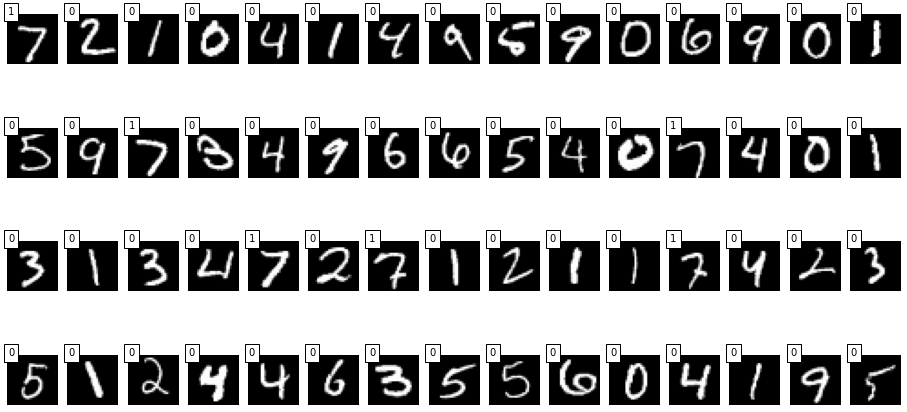

In [34]:
show_results(model)

Another small improvement.

### Wrapping all the code together and play with hyperparameters

The code below wraps up the pieces of codes above into a single function and allows you to play with the hyperparameters by changing the arguments. Try to get the best performance with only 2 training epochs!


In [35]:
nb_epoch = 2

In [36]:
# Function for constructing the convolution neural network
# Feel free to add parameters, if you want

def build_model(num_conv = 1, conv_activation = "relu", num_dense = 1, dense_activation  = "relu", 
               dropout = True, max_pooling = True):
    """"""
    model = Sequential()
    model.add(Conv2D(nb_filters, (nb_conv, nb_conv), 
                     padding='valid',
                     input_shape=shape_ord))
    model.add(Activation(conv_activation))
    
    for i in range(num_conv-1):
        model.add(Conv2D(nb_filters, (nb_conv, nb_conv)))
        model.add(Activation(conv_activation))
        
    if max_pooling is True:
        model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
        
    if dropout is True:
        model.add(Dropout(0.25))
    
    model.add(Flatten())

    if dropout is True:
        model.add(Dropout(0.5))
    
    for i in range(num_dense-1):
        model.add(Dense(128))
        model.add(Activation(dense_activation))
    
    model.add(Dense(nb_classes))
    model.add(Activation('softmax'))
    
    model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
    
    model.fit(X_train, Y_train, batch_size=batch_size, 
              epochs=nb_epoch,verbose=1,
              validation_data=(X_test, Y_test))
          

    #Evaluating the model on the test data    
    score, accuracy = model.evaluate(X_test, Y_test, verbose=0)
    print(num_conv , 'convolutional layers,', num_dense, "dense layers")
    if max_pooling: print("With max pooling")
    if dropout: print("With dropout")
    print('Test score:', score)
    print('Test accuracy:', accuracy)
    print(model.summary())
    show_results(model)
    #return accaccuracy

An example of running this function

Epoch 1/2
255/255 [==============================] - 4s 17ms/step - loss: 0.2986 - accuracy: 0.9005 - val_loss: 0.1282 - val_accuracy: 0.9706
Epoch 2/2
255/255 [==============================] - 4s 15ms/step - loss: 0.1568 - accuracy: 0.9440 - val_loss: 0.0939 - val_accuracy: 0.9749
1 convolutional layers, 1 dense layers
With max pooling
With dropout
Test score: 0.09392033517360687
Test accuracy: 0.9749000072479248
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_8 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (N

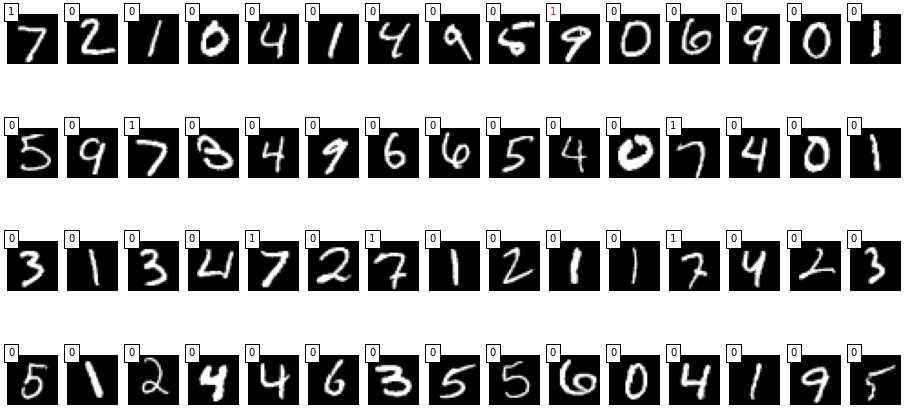

In [37]:
# Here is an example of running build_model() with default hyperparameters
build_model()

Epoch 1/2
255/255 [==============================] - 20s 80ms/step - loss: 0.3425 - accuracy: 0.8349 - val_loss: 0.1079 - val_accuracy: 0.9641
Epoch 2/2
255/255 [==============================] - 21s 81ms/step - loss: 0.1497 - accuracy: 0.9449 - val_loss: 0.0901 - val_accuracy: 0.9690
3 convolutional layers, 3 dense layers
With max pooling
With dropout
Test score: 0.09011814743280411
Test accuracy: 0.968999981880188
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_10 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_11 (Activation)   (

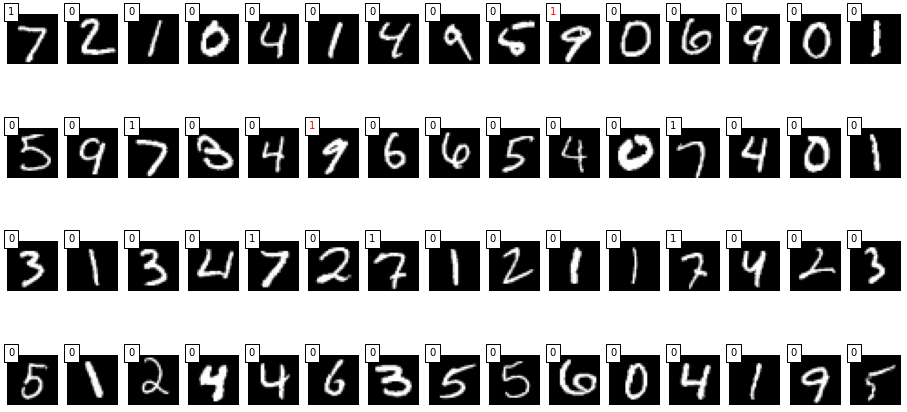

In [38]:
# Here is an example of running build_model() with new hyperparameters
build_model(num_conv = 3, num_dense = 3)

Epoch 1/2
255/255 [==============================] - 4s 16ms/step - loss: 0.3062 - accuracy: 0.8922 - val_loss: 0.1392 - val_accuracy: 0.9653
Epoch 2/2
255/255 [==============================] - 4s 14ms/step - loss: 0.1566 - accuracy: 0.9452 - val_loss: 0.1087 - val_accuracy: 0.9675
1 convolutional layers, 1 dense layers
With max pooling
With dropout
Test score: 0.10868179798126221
Test accuracy: 0.9674999713897705
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_16 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (N

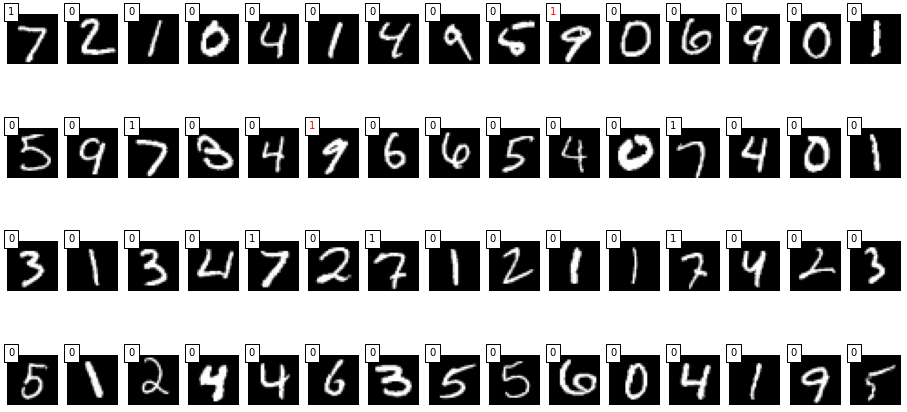

In [39]:
#Timing how long it takes to build the model and test it.
%timeit -n1 -r1 build_model()

#### Question 2.6 (5 points): Try to change some of the **hyperparameters** without exploding the computational resources on your computer and only using 2 training epochs. 
What is the best accuracy you can get? How many trainable parameters does your model have? How long does the training take?

In [45]:
# Function for constructing the convolution neural network
# Feel free to add parameters, if you want

def build_model(num_conv = 1, conv_activation = "relu", num_dense = 1, dense_activation  = "relu", 
               dropout = True, max_pooling = True):
    """"""
    model = Sequential()
    model.add(Conv2D(nb_filters, (nb_conv, nb_conv), 
                     padding='valid',
                     input_shape=shape_ord))
    model.add(Activation(conv_activation))
    
    for i in range(num_conv-1):
        model.add(Conv2D(nb_filters, (nb_conv, nb_conv)))
        model.add(Activation(conv_activation))
        
    if max_pooling is True:
        model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
        
    if dropout is True:
        model.add(Dropout(0.25))
    
    model.add(Flatten())

    if dropout is True:
        model.add(Dropout(0.5))
    
    for i in range(num_dense-1):
        model.add(Dense(128))
        model.add(Activation(dense_activation))
    
    model.add(Dense(nb_classes))
    model.add(Activation('softmax'))
    
    model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
    
    model.fit(X_train, Y_train, batch_size=batch_size, 
              epochs=nb_epoch,verbose=1,
              validation_data=(X_test, Y_test))
          

    #Evaluating the model on the test data    
    score, accuracy = model.evaluate(X_test, Y_test, verbose=0)
    return accuracy

In [46]:
r = {}
for i in range(5):
    for j in range(5):
        acc = build_model(num_conv=j, num_dense=i)
        r[("num_conv: ", j, "num_dense:", i)] = acc
print(r)

Epoch 1/2
255/255 [==============================] - 4s 15ms/step - loss: 0.2911 - accuracy: 0.9024 - val_loss: 0.1341 - val_accuracy: 0.9676
Epoch 2/2
255/255 [==============================] - 4s 14ms/step - loss: 0.1544 - accuracy: 0.9477 - val_loss: 0.0870 - val_accuracy: 0.9763
Epoch 1/2
255/255 [==============================] - 4s 16ms/step - loss: 0.2944 - accuracy: 0.9025 - val_loss: 0.1314 - val_accuracy: 0.9661
Epoch 2/2
255/255 [==============================] - 4s 16ms/step - loss: 0.1616 - accuracy: 0.9419 - val_loss: 0.1062 - val_accuracy: 0.9686
Epoch 1/2
255/255 [==============================] - 12s 46ms/step - loss: 0.2999 - accuracy: 0.8816 - val_loss: 0.1275 - val_accuracy: 0.9636
Epoch 2/2
255/255 [==============================] - 12s 47ms/step - loss: 0.1486 - accuracy: 0.9462 - val_loss: 0.0719 - val_accuracy: 0.9790
Epoch 1/2
255/255 [==============================] - 21s 81ms/step - loss: 0.3042 - accuracy: 0.8786 - val_loss: 0.1066 - val_accuracy: 0.9689
Epo

In [47]:
print("Max accuracy: ", max(r.values()))
print("Hyperparameters used to get the max accuracy: ", max(r, key=r.get))

Max accuracy:  0.9811000227928162
Hyperparameters used to get the max accuracy:  ('num_conv: ', 3, 'num_dense:', 2)


In [48]:
build_model(num_conv = 3, num_dense = 2)

Epoch 1/2
255/255 [==============================] - 20s 78ms/step - loss: 0.2990 - accuracy: 0.8693 - val_loss: 0.0742 - val_accuracy: 0.9790
Epoch 2/2
255/255 [==============================] - 20s 79ms/step - loss: 0.1477 - accuracy: 0.9465 - val_loss: 0.0642 - val_accuracy: 0.9802


0.9801999926567078

In [49]:
%timeit -n1 -r1 build_model()

Epoch 1/2
255/255 [==============================] - 4s 18ms/step - loss: 0.2958 - accuracy: 0.9005 - val_loss: 0.1208 - val_accuracy: 0.9710
Epoch 2/2
255/255 [==============================] - 4s 17ms/step - loss: 0.1551 - accuracy: 0.9464 - val_loss: 0.1050 - val_accuracy: 0.9681
9.84 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


#### Question 2.7 (15 points)

Can you train a model to output 10 classes instead of 2 binary classes? We can use this model to classify images into 10 digits of the mnist data set. Again, we will only train our model on a subset of the training data. The following steps will help you to build such a model.

    * 1. Select 20,000 examples randomly from X_train, since we want all 10 digits present in our training data.
    * 2. Convert Y_train and Y_test to categorical.
    * 3. Call the build_model() on the X_train and Y_train.

In [51]:
from keras import backend as K
from tensorflow.keras.utils import to_categorical
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

img_rows, img_cols = 28, 28

if K.image_data_format() == 'channels_first':
    shape_ord = (1, img_rows, img_cols)
else:  # channel_last
    shape_ord = (img_rows, img_cols, 1)

# Normalize the images:
X_train = X_train[:20000]
Y_train = y_train[:20000]
X_train = X_train.reshape((X_train.shape[0],) + shape_ord)
X_test = X_test.reshape((X_test.shape[0],) + shape_ord)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255


Y_train = to_categorical(Y_train)
Y_test = to_categorical(y_test)
nb_classes = 10

In [52]:
# Function for constructing the convolution neural network
# Feel free to add parameters, if you want

def build_model(num_conv = 1, conv_activation = "relu", num_dense = 1, dense_activation  = "relu", 
               dropout = True, max_pooling = True):
    """"""
    model = Sequential()
    model.add(Conv2D(nb_filters, (nb_conv, nb_conv), 
                     padding='valid',
                     input_shape=shape_ord))
    model.add(Activation(conv_activation))
    
    for i in range(num_conv-1):
        model.add(Conv2D(nb_filters, (nb_conv, nb_conv)))
        model.add(Activation(conv_activation))
        
    if max_pooling is True:
        model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
        
    if dropout is True:
        model.add(Dropout(0.25))
    
    model.add(Flatten())

    if dropout is True:
        model.add(Dropout(0.5))
    
    for i in range(num_dense-1):
        model.add(Dense(128))
        model.add(Activation(dense_activation))
    
    model.add(Dense(nb_classes))
    model.add(Activation('softmax'))
    
    model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
    
    model.fit(X_train, Y_train, batch_size=batch_size, 
              epochs=nb_epoch,verbose=1,
              validation_data=(X_test, Y_test))
          

    #Evaluating the model on the test data    
    score, accuracy = model.evaluate(X_test, Y_test, verbose=0)
    print(num_conv , 'convolutional layers,', num_dense, "dense layers")
    if max_pooling: print("With max pooling")
    if dropout: print("With dropout")
    print('Test score:', score)
    print('Test accuracy:', accuracy)
    print(model.summary())
    show_results(model)
    #return accaccuracy

In [53]:
def show_results(model):
    rows = 4
    columns = 15
    sliced = rows*columns
    predicted = model.predict(X_test[:sliced]).argmax(-1)
    plt.figure(figsize=(16,8))
    for i in range(sliced):
        plt.subplot(rows, columns, i+1)
        plt.imshow(X_test_orig[i], cmap='gray', vmin=0, vmax=255)
        color = 'black' if np.where(Y_test[i] == 1)[0][0] == predicted[i] else 'red'
        plt.text(0, 0, predicted[i], color=color, 
                 bbox=dict(facecolor='white', alpha=1))
        plt.axis('off')

Epoch 1/2
313/313 [==============================] - 26s 83ms/step - loss: 1.4538 - accuracy: 0.5124 - val_loss: 0.4667 - val_accuracy: 0.8523
Epoch 2/2
313/313 [==============================] - 27s 86ms/step - loss: 0.5451 - accuracy: 0.8317 - val_loss: 0.3279 - val_accuracy: 0.9053
3 convolutional layers, 2 dense layers
With max pooling
With dropout
Test score: 0.3278895616531372
Test accuracy: 0.9053000211715698
Model: "sequential_40"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_76 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
activation_149 (Activation)  (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_77 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_150 (Activation)  

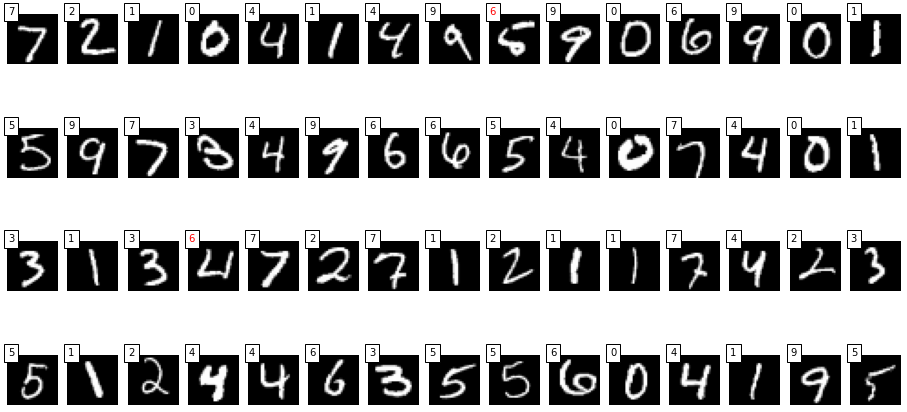

In [54]:
build_model(num_conv = 3, num_dense = 2)

#### Question 2.8 (30 points) 

Train a model on CIFAR10 dataset, which is described in https://www.cs.toronto.edu/~kriz/cifar.html. You can load the dataset from Keras, too. CIFAR10 small image classification contains 50,000 32x32 color training images, labeled over 10 categories, and 10,000 test images.

```python
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
```

Again, we will only train our model on a subset of the training data. The following steps will help you to build such a model.

    * 1. Select 20,000 examples randomly from X_train, since we want all 10 categories present in our training data.
    * 2. Convert Y_train and Y_test to categorical.
    * 3. Call the build_model() on the X_train and Y_train.

In [24]:
from keras.datasets import cifar10
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

In [25]:
from keras import backend as K
from tensorflow.keras.utils import to_categorical


img_rows, img_cols = 32, 32

if K.image_data_format() == 'channels_first':
    shape_ord = (3, img_rows, img_cols)
else:  # channel_last
    shape_ord = (img_rows, img_cols, 3)

# Normalize the images:
X_train = X_train[:20000]
Y_train = Y_train[:20000]
X_train = X_train.reshape((X_train.shape[0],) + shape_ord)
X_test = X_test.reshape((X_test.shape[0],) + shape_ord)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255


Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)
nb_classes = 10

In [26]:
def show_results_cifar(model):
    rows = 4
    columns = 15
    sliced = rows*columns
    predicted = model.predict(X_test[:sliced]).argmax(-1)
    plt.figure(figsize=(16,8))
    for i in range(sliced):
        plt.subplot(rows, columns, i+1)
        plt.imshow(X_test[i], cmap='gray', vmin=0, vmax=255)
        color = 'black' if np.where(Y_test[i] == 1)[0][0] == predicted[i] else 'red'
        plt.text(0, 0, predicted[i], color=color, 
                 bbox=dict(facecolor='white', alpha=1))
        plt.axis('off')

In [27]:
# Function for constructing the convolution neural network
# Feel free to add parameters, if you want

def build_model(num_conv = 1, conv_activation = "relu", num_dense = 1, dense_activation  = "relu", 
               dropout = True, max_pooling = True):
    """"""
    model = Sequential()
    model.add(Conv2D(nb_filters, (nb_conv, nb_conv), 
                     padding='valid',
                     input_shape=shape_ord))
    model.add(Activation(conv_activation))
    
    for i in range(num_conv-1):
        model.add(Conv2D(nb_filters, (nb_conv, nb_conv)))
        model.add(Activation(conv_activation))
        
    if max_pooling is True:
        model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
        
    if dropout is True:
        model.add(Dropout(0.25))
    
    model.add(Flatten())

    if dropout is True:
        model.add(Dropout(0.5))
    
    for i in range(num_dense-1):
        model.add(Dense(128))
        model.add(Activation(dense_activation))
    
    model.add(Dense(nb_classes))
    model.add(Activation('softmax'))
    
    model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
    
    model.fit(X_train, Y_train, batch_size=batch_size, 
              epochs=nb_epoch,verbose=1,
              validation_data=(X_test, Y_test))
          

    #Evaluating the model on the test data    
    score, accuracy = model.evaluate(X_test, Y_test, verbose=0)
    print(num_conv , 'convolutional layers,', num_dense, "dense layers")
    if max_pooling: print("With max pooling")
    if dropout: print("With dropout")
    print('Test score:', score)
    print('Test accuracy:', accuracy)
    print(model.summary())
    show_results_cifar(model)
    #return accaccuracy

In [30]:
nb_epoch = 10
build_model(num_conv = 6, num_dense = 2, dropout=False)

NameError: name 'nb_filters' is not defined